Visualizing Images per Category

Training set distribution:
{'cardboard': 322, 'glass': 294, 'metal': 553, 'miscellaneous': 346, 'organic': 287, 'paper': 350, 'plastic': 644, 'textile': 222, 'vegetation': 305}


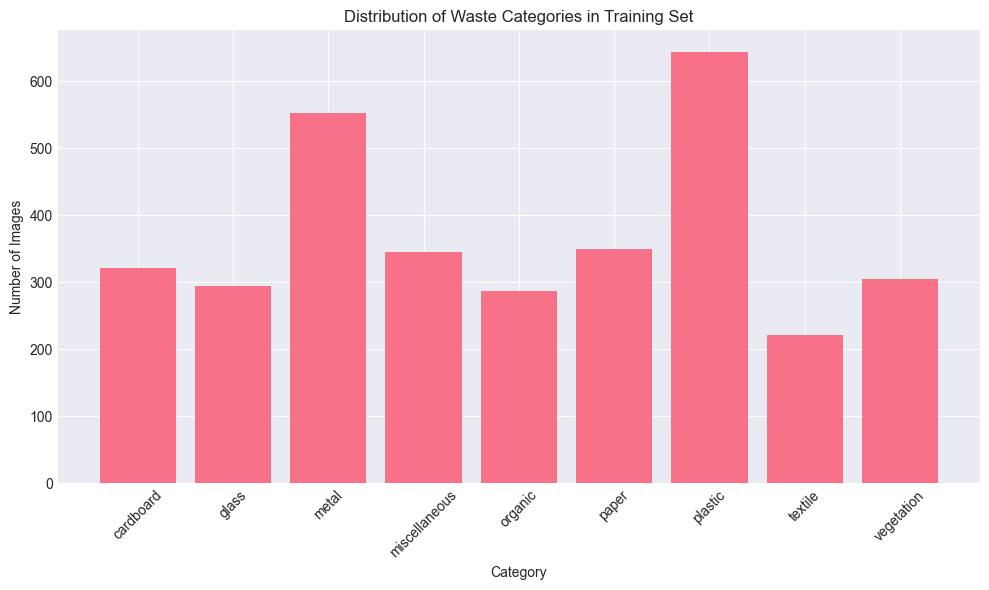

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(PROJECT_ROOT, "data", "processed")
TRAIN_DIR = os.path.join(DATA_DIR, "train")
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def count_images(data_dir):
    categories=os.listdir(data_dir)
    counts = {}

    for category in categories:
        if os.path.isdir(f'{data_dir}/{category}'):
            counts[category]=len(os.listdir(f'{data_dir}/{category}'))
    
    return counts

train_counts = count_images(TRAIN_DIR)
print("Training set distribution:")
print(train_counts)

plt.figure(figsize=(10, 6))
plt.bar(train_counts.keys(), train_counts.values())
plt.title('Distribution of Waste Categories in Training Set')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Display Sample Images

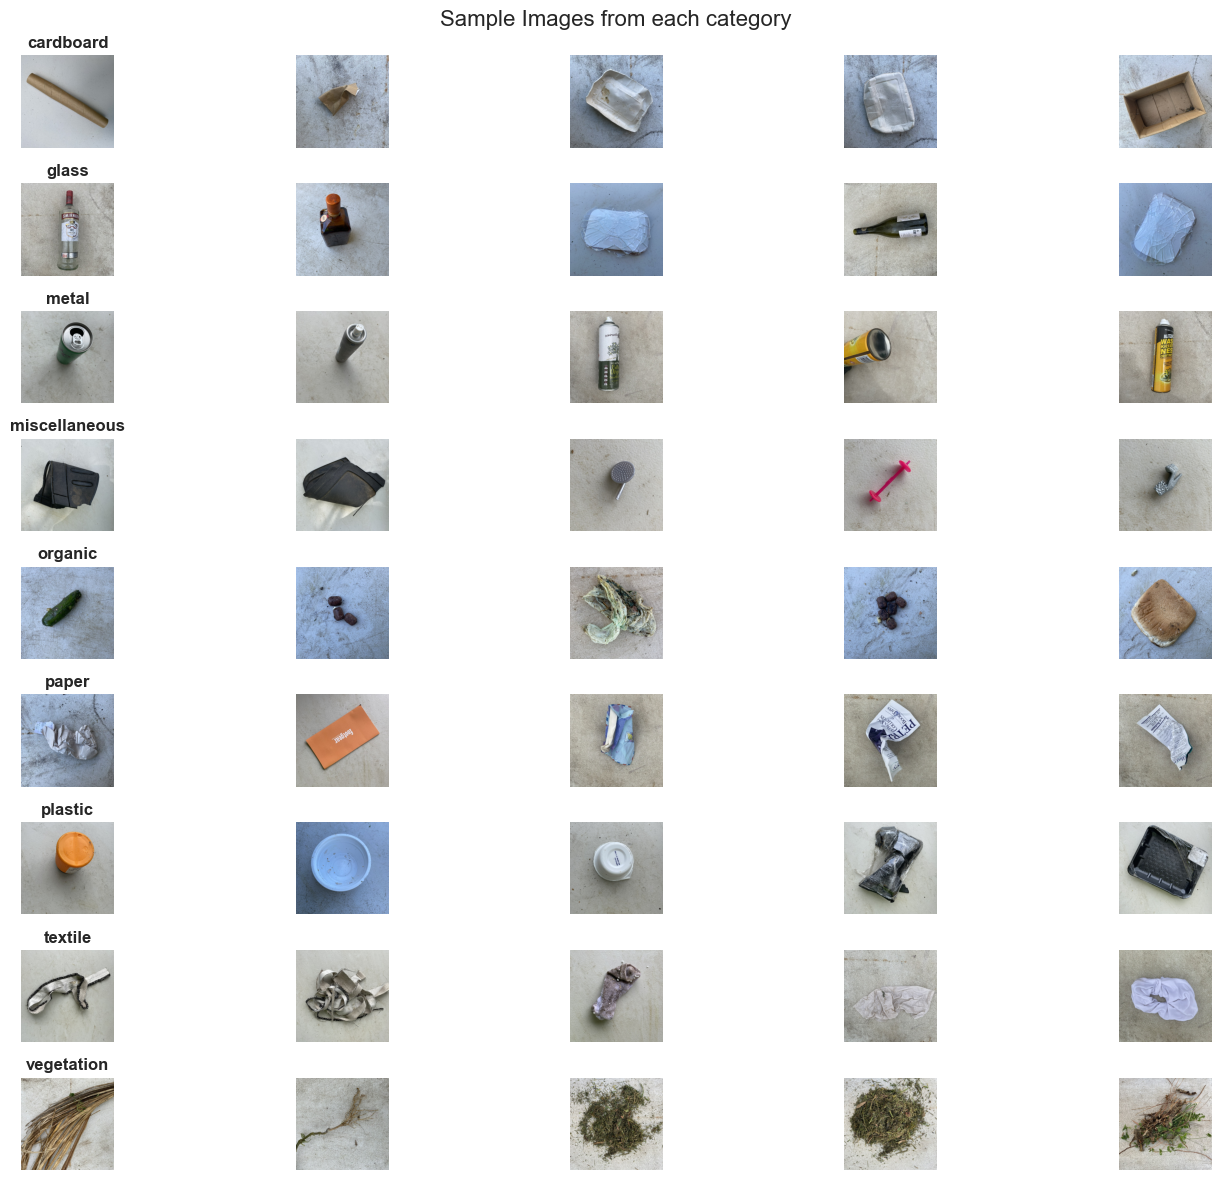

In [6]:
from PIL import Image
import os
import matplotlib.pyplot as plt

def display_samples(data_dir, num_samples=5):
    categories = [
        d for d in os.listdir(data_dir)
        if os.path.isdir(os.path.join(data_dir, d))
    ]

    fig, axes = plt.subplots(len(categories), num_samples, figsize=(15, 12))
    fig.suptitle("Sample Images from each category", fontsize=16)

    for i, category in enumerate(categories):
        category_path = os.path.join(data_dir, category)

        images = [
            f for f in os.listdir(category_path)
            if os.path.isfile(os.path.join(category_path, f))
               and f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ][:num_samples]

        for j, img_name in enumerate(images):
            img_path = os.path.join(category_path, img_name)
            img = Image.open(img_path)

            axes[i, j].imshow(img)
            axes[i, j].axis("off")

            if j == 0:
                axes[i, j].set_title(category, fontsize=12, fontweight="bold")

    plt.tight_layout()
    plt.show()

display_samples(TRAIN_DIR)

Analyzing Image Dimensions

Average dimensions: [524. 524.]
Min dimensions: [524 524]
Max dimensions: [524 524]


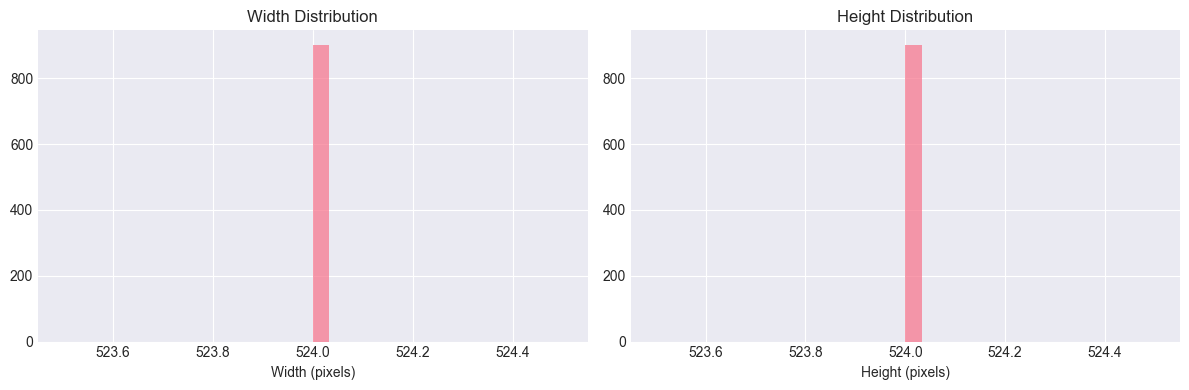

In [7]:
def analyze_dimensions(data_dir):
    dimensions=[]
    categories = [d for d in os.listdir(data_dir) if os.path.isdir(f'{data_dir}/{d}')]

    for category in categories:
        category_path=f'{data_dir}/{category}'
        for img_name in os.listdir(category_path)[:100]:
            img = Image.open(f'{category_path}/{img_name}')
            dimensions.append(img.size)

    dimensions = np.array(dimensions)

    print(f"Average dimensions: {dimensions.mean(axis=0)}")
    print(f"Min dimensions: {dimensions.min(axis=0)}")
    print(f"Max dimensions: {dimensions.max(axis=0)}")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    ax1.hist(dimensions[:, 0], bins=30, alpha=0.7)
    ax1.set_title('Width Distribution')
    ax1.set_xlabel('Width (pixels)')
    
    ax2.hist(dimensions[:, 1], bins=30, alpha=0.7)
    ax2.set_title('Height Distribution')
    ax2.set_xlabel('Height (pixels)')
    
    plt.tight_layout()
    plt.show()

analyze_dimensions(TRAIN_DIR)